<a href="https://colab.research.google.com/github/sakshamsharma57/US-Home-Prices-Influencing-Factors/blob/main/UShomeprice_Model_Deployment(PT_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"US Housing Trends Analyzer and Influence Explorer"**

**Build a data science models that explains how these factors impacted home prices over the last 20 years.**


##Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
us_house_price_df = pd.read_csv('/content/saksham_UShomeprice_final_dataset.csv')
us_house_price_df.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households_x,median_income_x,Num_Households_y,median_income_y
0,2014-06-01,164.065,2014,6,34.24475,203042200.0,5.7,237.231,6.1,68.15089,214.5,0.10,123229.0,64900.0,123229.0,64900.0
1,2014-07-01,164.585,2014,7,34.33250,203037900.0,6.2,237.498,6.2,68.15983,214.8,0.09,123229.0,64900.0,123229.0,64900.0
2,2014-08-01,165.211,2014,8,34.42025,203158700.0,5.4,237.460,6.1,68.21954,215.5,0.09,123229.0,64900.0,123229.0,64900.0
3,2014-09-01,165.901,2014,9,34.50800,203208200.0,5.4,237.477,5.9,68.27581,215.7,0.09,123229.0,64900.0,123229.0,64900.0
4,2014-10-01,166.637,2014,10,34.59575,203258500.0,5.3,237.430,5.7,68.57591,215.9,0.09,123229.0,64900.0,123229.0,64900.0


In [95]:
us_house_price_df.drop(columns = ["Year","DATE", "Month"], inplace = True)

#**Exploratory Data Analysis (EDA)**
###Summary Statistics:
Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [96]:
#summarise stats
us_house_price_df.describe()

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households_x,median_income_x,Num_Households_y,median_income_y
count,103.000000,103.000000,1.030000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,213.639816,40.876107,2.056792e+08,5.775728,255.107621,4.963107,69.640809,248.192738,0.898738,127404.533981,73170.679612,127404.533981,73170.679612
std,41.238900,4.627651,1.074424e+06,1.334715,17.512844,1.828746,1.823468,44.166214,0.954953,2229.617169,3743.677877,2229.617169,3743.677877
min,164.065000,34.244750,2.030379e+08,3.300000,234.747000,3.500000,60.171120,210.900000,0.050000,123229.000000,64900.000000,123229.000000,64900.000000
25%,181.341500,36.730417,2.052778e+08,5.150000,240.383500,3.800000,68.682620,215.600000,0.095000,125819.000000,70840.000000,125819.000000,70840.000000
50%,204.313000,39.743000,2.057276e+08,5.500000,252.182000,4.500000,70.001370,233.800000,0.400000,127586.000000,73030.000000,127586.000000,73030.000000
75%,231.433500,45.059000,2.063726e+08,6.100000,260.572000,5.400000,70.958870,246.650000,1.565000,128579.000000,76330.000000,128579.000000,76330.000000
max,304.468000,48.021000,2.075878e+08,10.600000,298.812000,14.800000,71.801730,353.015000,4.100000,131202.000000,78250.000000,131202.000000,78250.000000


##**Correlation Analysis**

In [97]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households_x,median_income_x,Num_Households_y,median_income_y
CSUSHPISA,1.000000,0.939985,0.651808,0.581138,0.989857,-0.141829,0.275406,0.969758,0.231819,0.920286,0.612307,0.920286,0.612307
Per_Capita_GDP,0.939985,1.000000,0.637353,0.394072,0.927900,0.017424,0.147743,0.860985,0.193176,0.939569,0.776112,0.939569,0.776112
working_age_pop,0.651808,0.637353,1.000000,0.523542,0.676995,-0.238390,0.369290,0.528273,0.635620,0.822234,0.698052,0.822234,0.698052
Houses,0.581138,0.394072,0.523542,1.000000,0.636891,-0.406850,0.457351,0.618147,0.558102,0.486823,0.112808,0.486823,0.112808
CPI,0.989857,0.927900,0.676995,0.636891,1.000000,-0.171386,0.313003,0.952149,0.333175,0.920531,0.606475,0.920531,0.606475
UNRATE,-0.141829,0.017424,-0.238390,-0.406850,-0.171386,1.000000,-0.973623,-0.194081,-0.526100,-0.147761,-0.023063,-0.147761,-0.023063
EmpRate,0.275406,0.147743,0.369290,0.457351,0.313003,-0.973623,1.000000,0.298288,0.618365,0.315852,0.203981,0.315852,0.203981
Cons_Material,0.969758,0.860985,0.528273,0.618147,0.952149,-0.194081,0.298288,1.000000,0.149640,0.826579,0.458844,0.826579,0.458844
FEDFUNDS,0.231819,0.193176,0.635620,0.558102,0.333175,-0.526100,0.618365,0.149640,1.000000,0.407961,0.379956,0.407961,0.379956
Num_Households_x,0.920286,0.939569,0.822234,0.486823,0.920531,-0.147761,0.315852,0.826579,0.407961,1.000000,0.834698,1.000000,0.834698


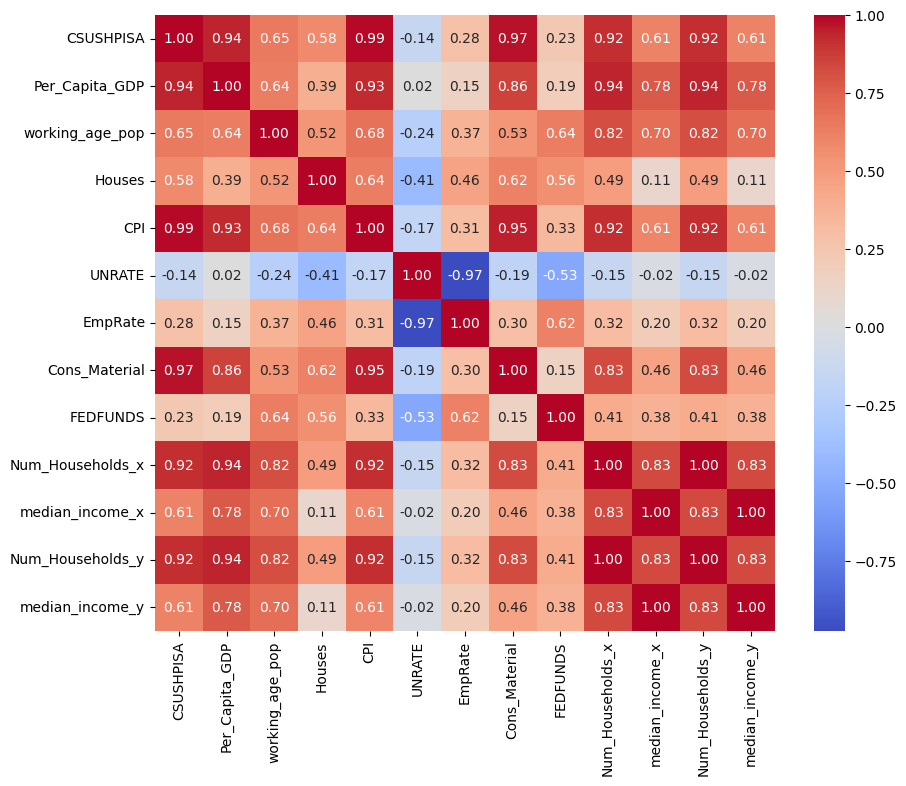

In [98]:
#viusalization using HEATMAP
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.show()

#Time Series Analysis
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.



In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [100]:
# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

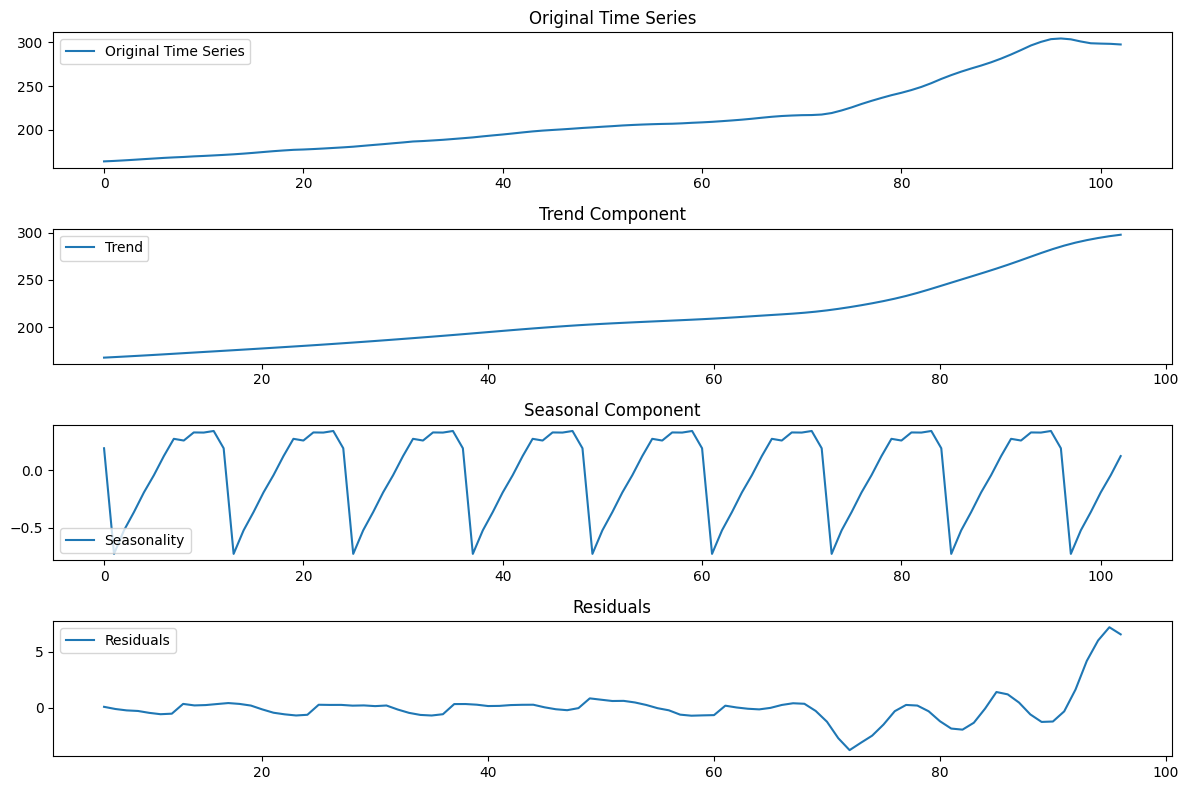

In [101]:
# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

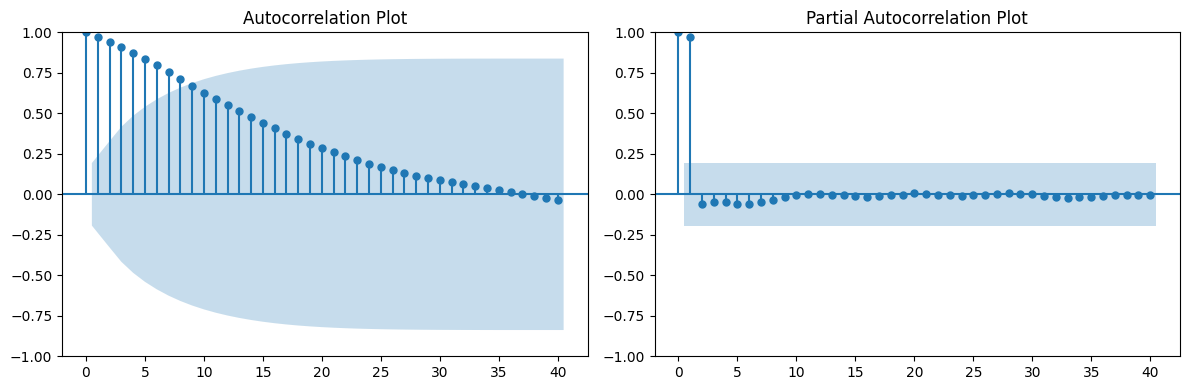

In [102]:
# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

#DATA VISUALIZATION
Visualize the data using various plots and graphs to understand its distribution and trends.

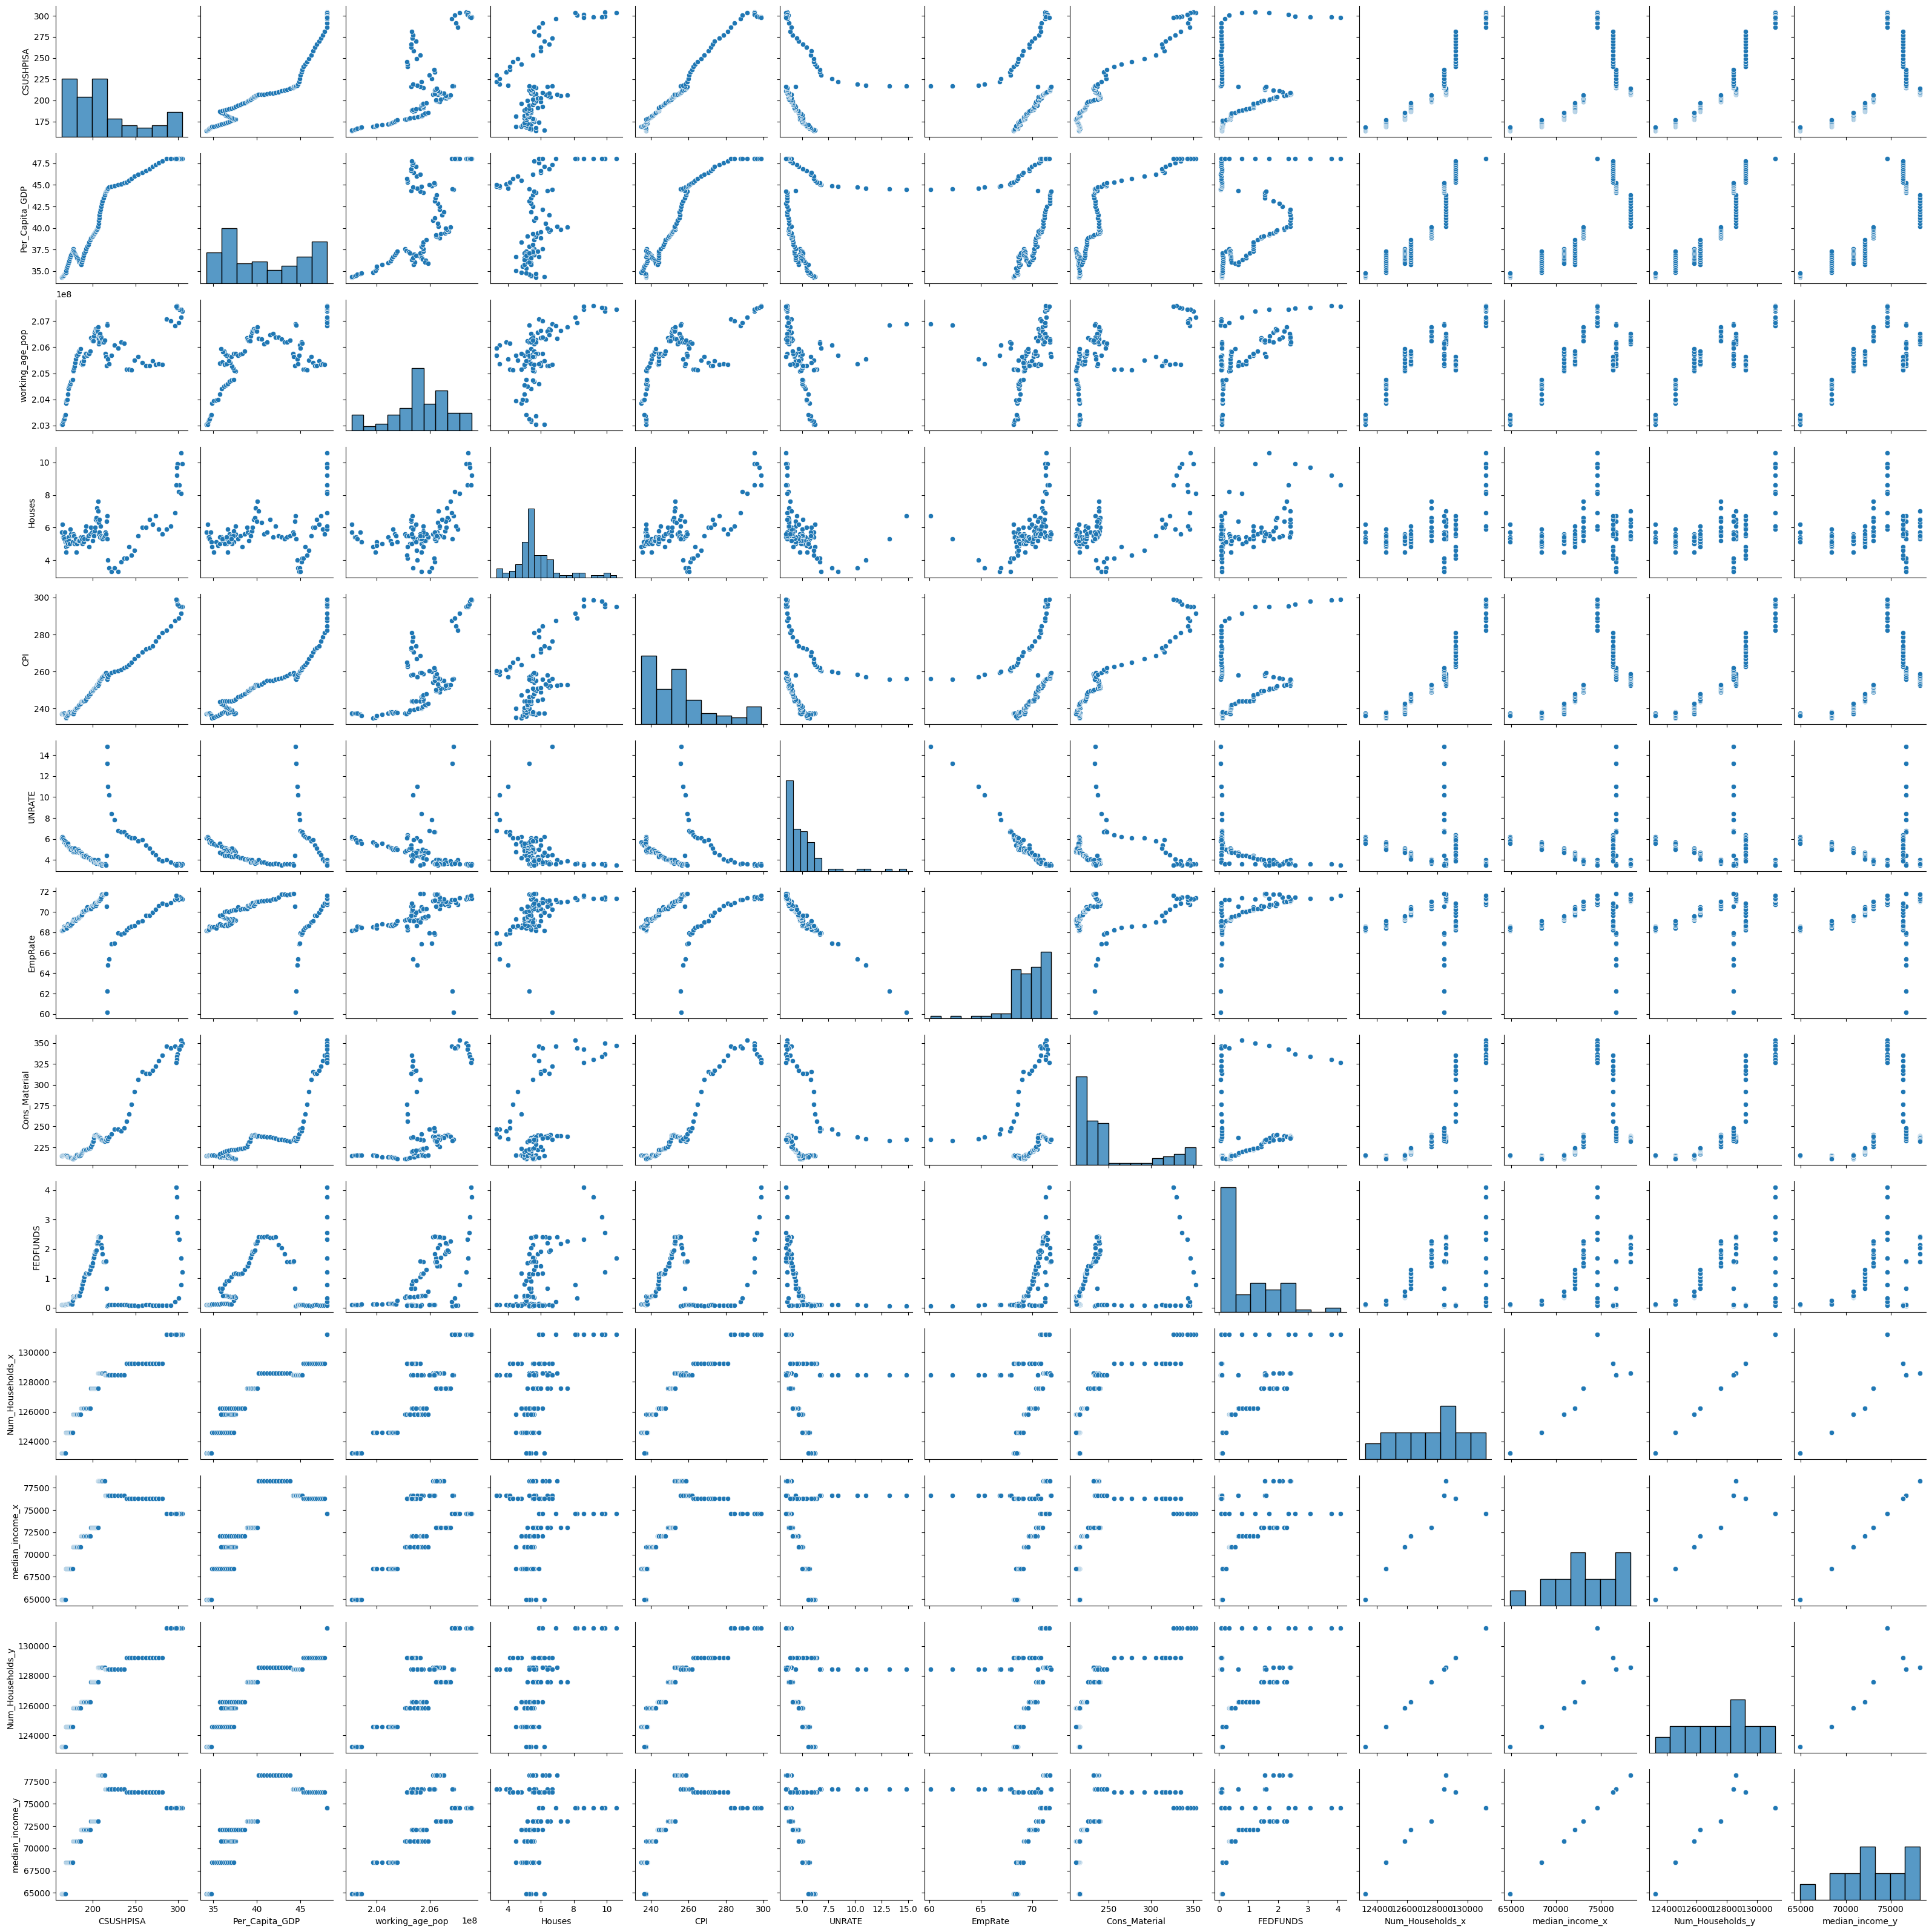

In [103]:
sns.pairplot(us_house_price_df)

In [104]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'Num_Households_x',
       'median_income_x', 'Num_Households_y', 'median_income_y'],
      dtype='object')

In [105]:
factors = ['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'Num_Households_x',
       'median_income_x', 'Num_Households_y', 'median_income_y']

####Histograms and Kernel Density Plots

<Figure size 1300x800 with 0 Axes>

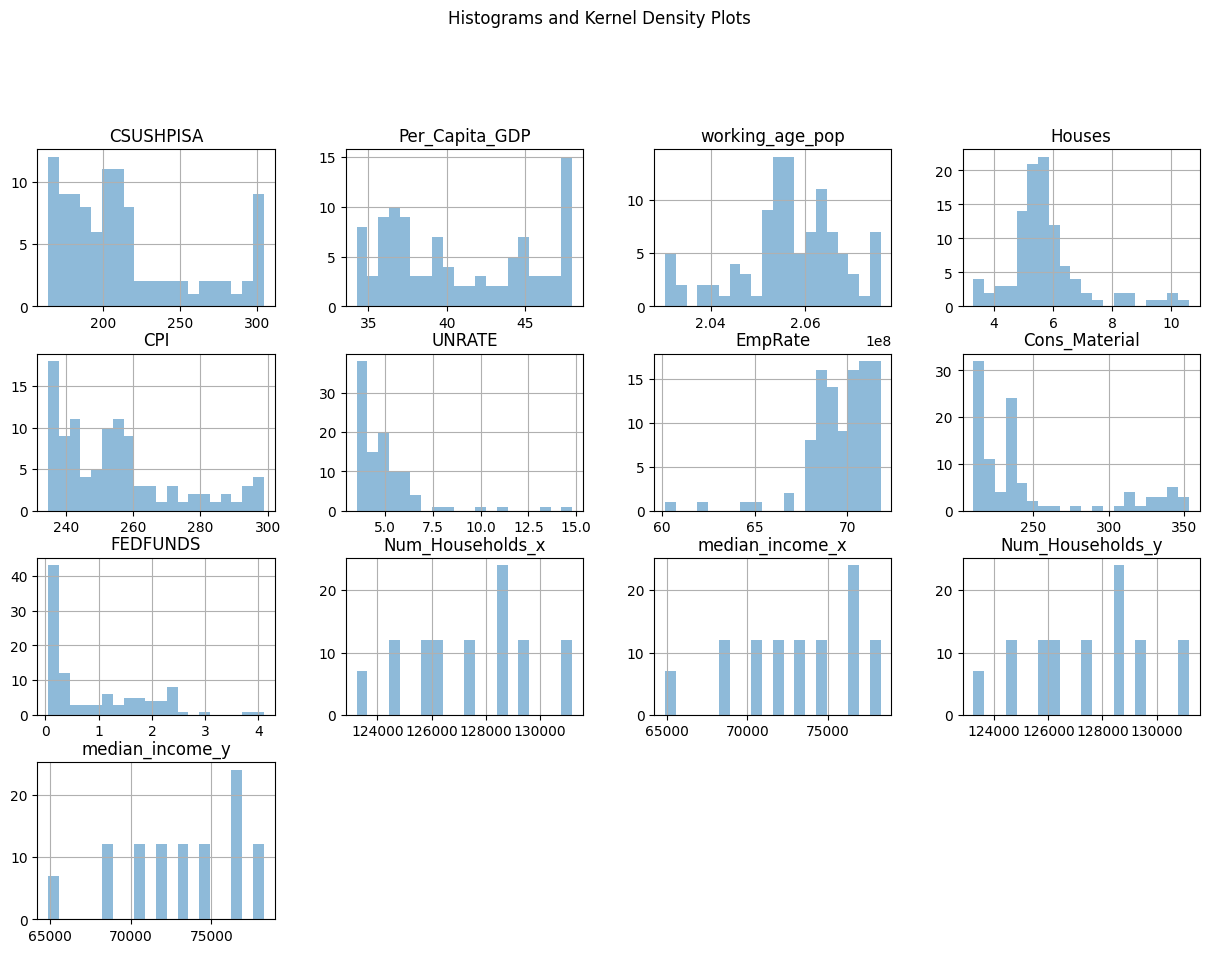

In [106]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

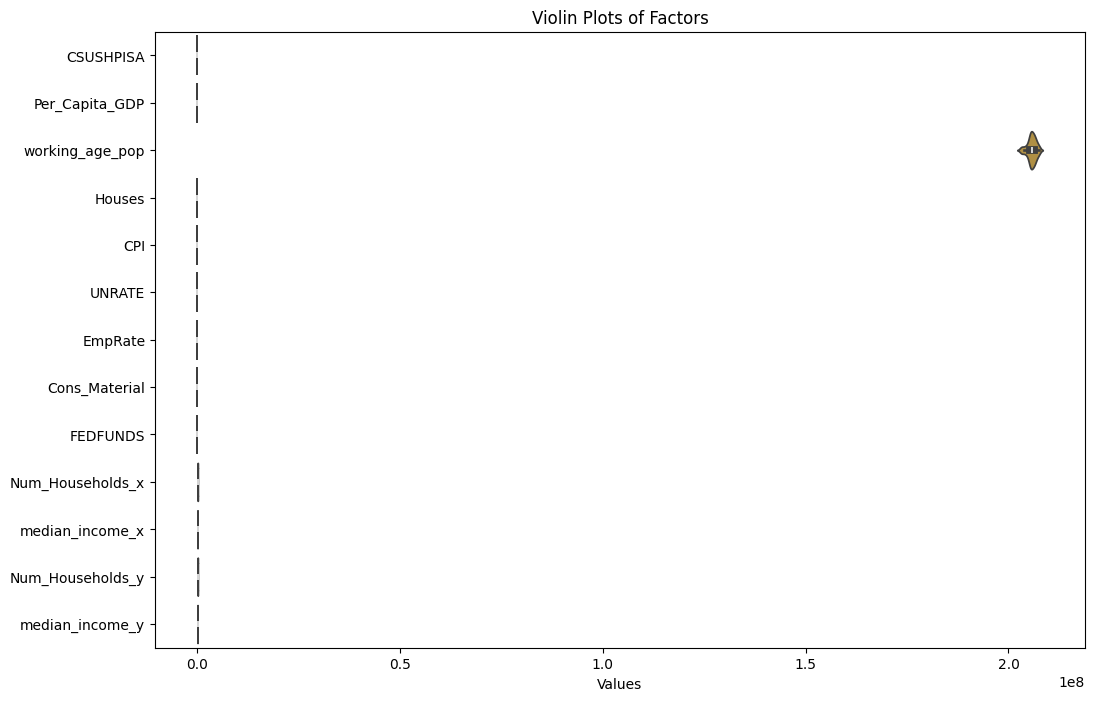

In [107]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

In [108]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

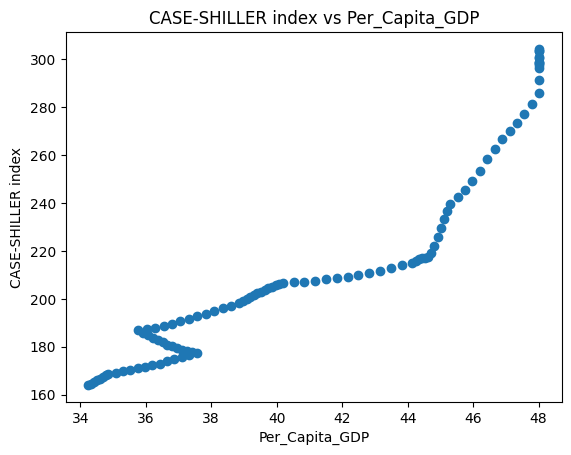

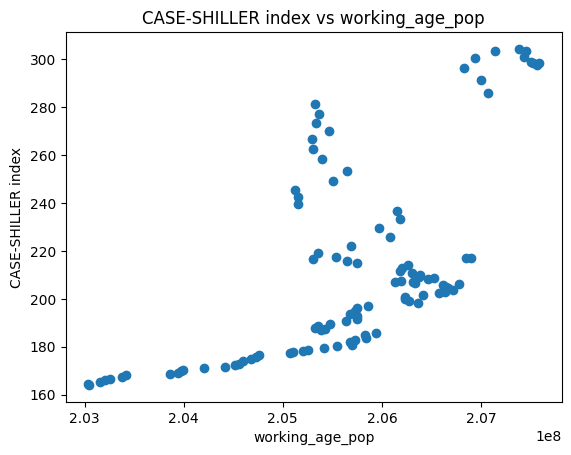

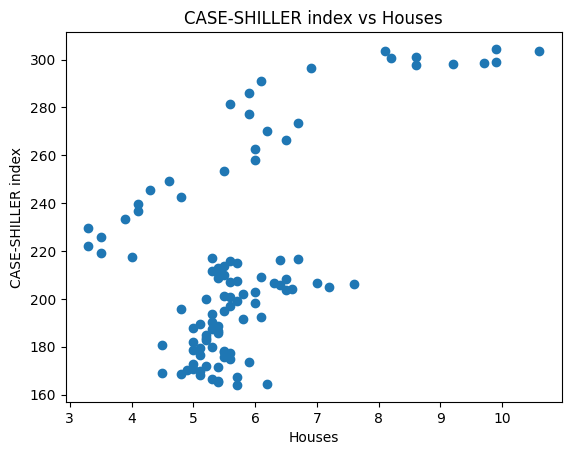

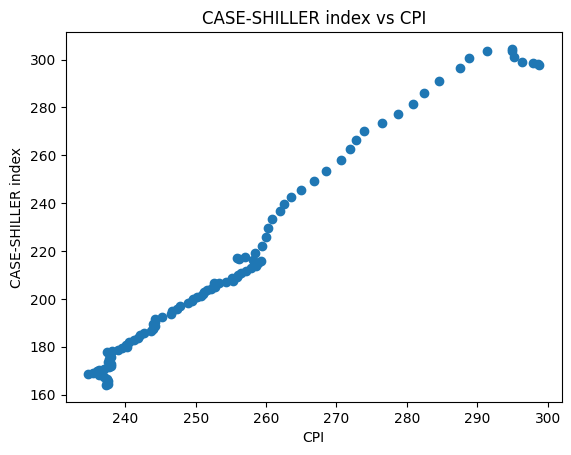

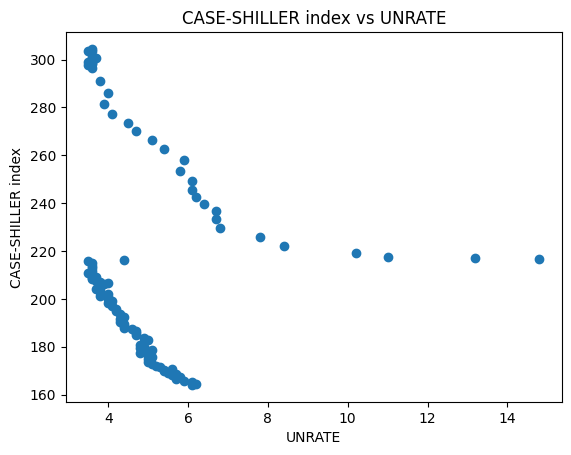

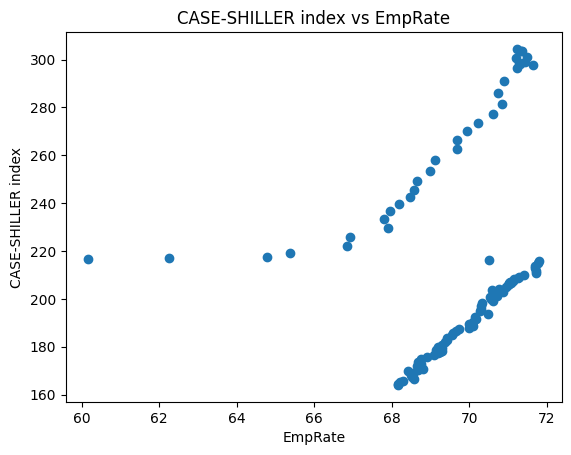

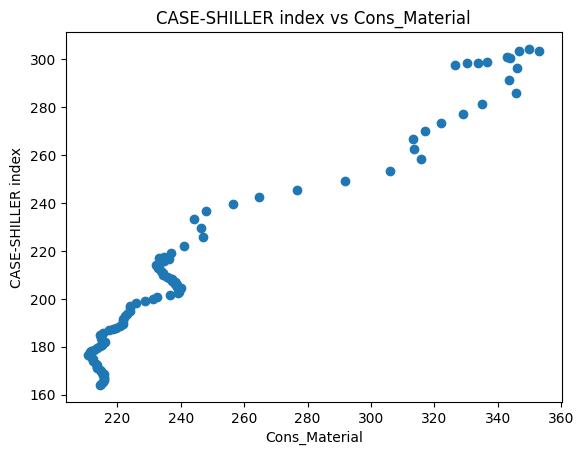

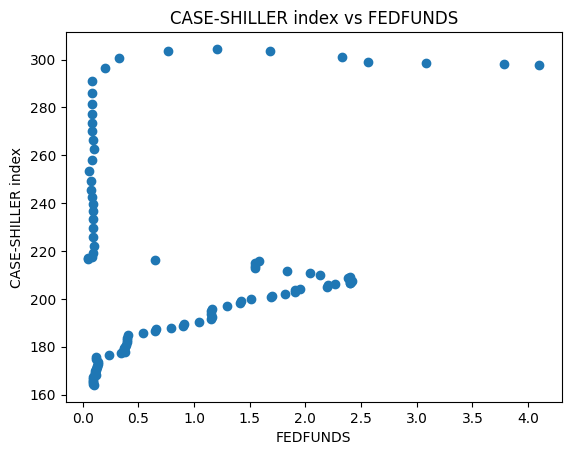

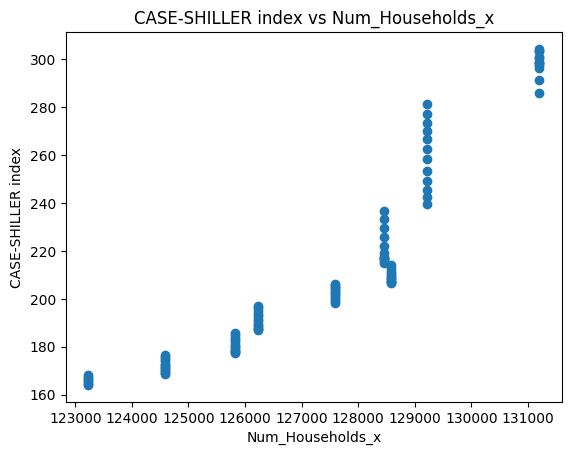

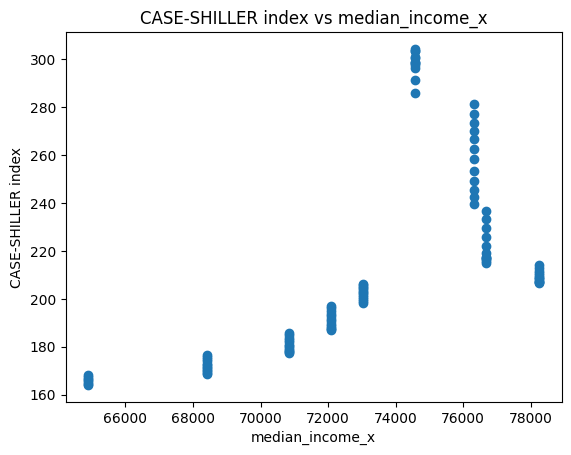

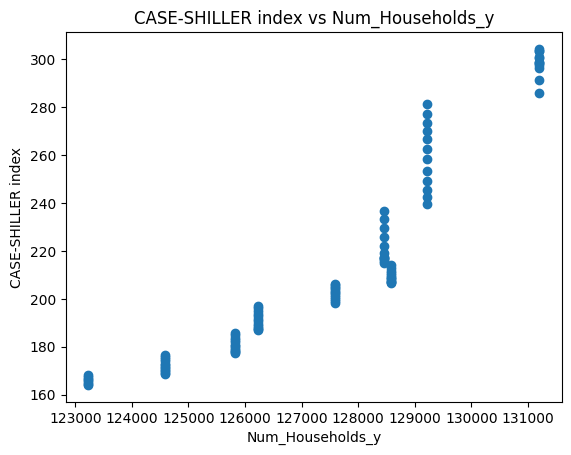

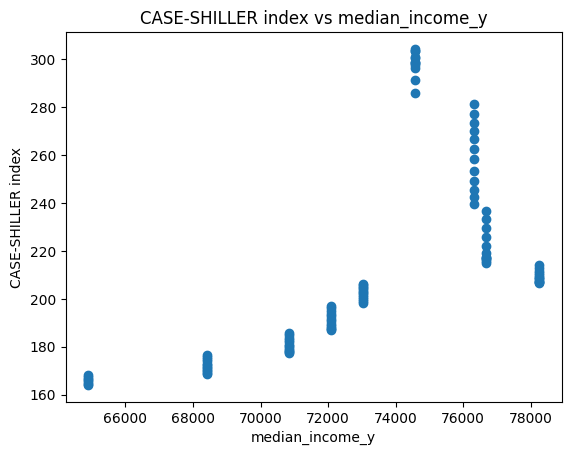

In [109]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [110]:
#Calculate correlation coefficients applying lambda column then sort correlations in ascending order and display features with lower correlation

correlations = X.apply(lambda column: column.corr(y))
correlations_sorted = correlations.sort_values(ascending=True)
print("Features with lower correlation:")
print(correlations_sorted)


Features with lower correlation:
UNRATE             -0.141829
FEDFUNDS            0.231819
EmpRate             0.275406
Houses              0.581138
median_income_x     0.612307
median_income_y     0.612307
working_age_pop     0.651808
Num_Households_x    0.920286
Num_Households_y    0.920286
Per_Capita_GDP      0.939985
Cons_Material       0.969758
CPI                 0.989857
dtype: float64


####**Highest Correlation:**

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. This feature shows a strong positive linear relationship with home prices.

####**Other Strong Correlations:**

'Cons_Material' (0.898972), 'Subsidy' (0.845065), 'old_age_pop' (0.842396), 'median_income' (0.831509), and 'CPI' (0.822250) also have strong positive correlations.

####**Moderate Correlations:**

'urban_pop_us' (0.788002), 'Num_Households' (0.748972), and 'working_age_pop' (0.619826) have moderate positive correlations.

####**Lower Correlations:**

'UNRATE' (0.475602), 'EmpRate' (0.199060), 'Houses' (0.177683), and 'FEDFUNDS' (0.113791) have lower correlations.

#**Data Science Models**

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [112]:
mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
# Only keep the columns that are actually present in the DataFrame
mult_cols_to_drop = [col for col in mult_cols if col in us_house_price_df.columns]
us_house_price_df.drop(columns=mult_cols_to_drop, inplace=True)
X = us_house_price_df
X

,Per_Capita_GDP,CPI,Cons_Material,Num_Households_x,median_income_x,Num_Households_y,median_income_y
0,34.24475,237.231,214.500,123229.0,64900.0,123229.0,64900.0
1,34.33250,237.498,214.800,123229.0,64900.0,123229.0,64900.0
2,34.42025,237.460,215.500,123229.0,64900.0,123229.0,64900.0
3,34.50800,237.477,215.700,123229.0,64900.0,123229.0,64900.0
4,34.59575,237.430,215.900,123229.0,64900.0,123229.0,64900.0
...,...,...,...,...,...,...,...
98,48.02100,295.209,342.753,131202.0,74580.0,131202.0,74580.0
99,48.02100,296.341,336.464,131202.0,74580.0,131202.0,74580.0
100,48.02100,297.863,333.796,131202.0,74580.0,131202.0,74580.0
101,48.02100,298.648,330.369,131202.0,74580.0,131202.0,74580.0


#**Models Building**

In [113]:
#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#starndardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 11.694226709965523
R-squared: 0.9933452932715401
Coefficients:
Per_Capita_GDP: 7.8745975550597755
CPI: 14.85340609449814
Cons_Material: 14.879622854261221
Num_Households_x: 2.7657291258844143
median_income_x: -0.886353874007078
Num_Households_y: 2.7657291258844126
median_income_y: -0.8863538740070744
Intercept: 214.38570731707318

Model: ElasticNet
Mean Squared Error: 45.23684213961413
R-squared: 0.9742575609976645
Coefficients:
Per_Capita_GDP: 6.7710343997781015
CPI: 9.089716415553731
Cons_Material: 10.379780248538966
Num_Households_x: 5.462311927671131
median_income_x: -0.0
Num_Households_y: 5.461355031179828
median_income_y: -0.0
Intercept: 214.38570731707318

Model: Random Forest
Mean Squared Error: 2.1914099708334
R-squared: 0.9987529581015142
Feature Importance Analysis:
Per_Capita_GDP: 0.2676096153636601
CPI: 0.23396037041376305
Cons_Material: 0.21775036483020685
Num_Households_x: 0.12382260544241412
median_income_x: 0.013091635113590

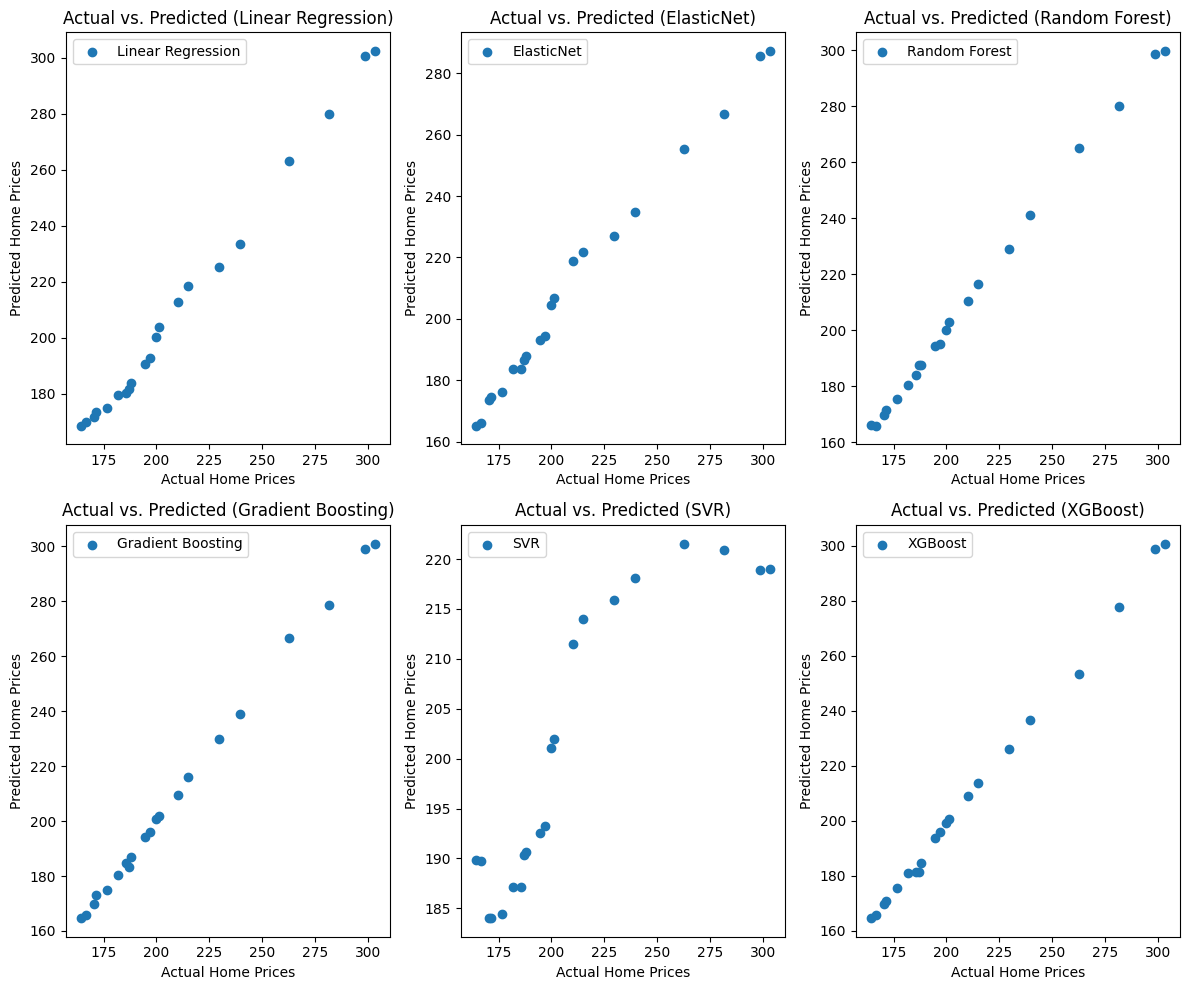


Best Model: RandomForestRegressor with MSE: 2.1914099708334


In [115]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2,3, figsize=(12,10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")

        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model

    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

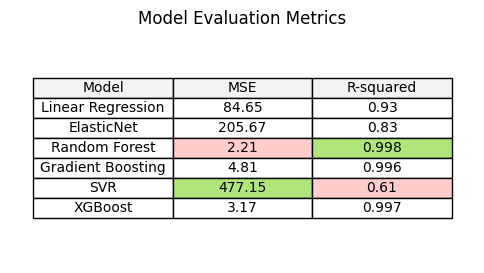

In [116]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3))

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

# Decision:

**Random Forest and XGBoost** appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

**Gradient Boosting** also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

**Linear Regression and ElasticNet** have higher MSE values, indicating potential limitations in predictive accuracy.

**SVR** has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

**Champion model:** In summary, based on the provided metrics, **Random Forest** appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

**Low MSE:** The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.

**High R-squared:** The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.

**Feature Importance:** The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential